# Summarizing data with PCA

This activity is meant to explore the results of applying PCA to a dataset.  Below, a dataset from a credit card company is loaded and displayed.  This dataset contains customer data pertaining to demographic and payment information as well as basic demographics.  The final column `default payment next month` is what we want to create profiles for.  

You are to use PCA and reduce the dimensionality of the data to 2 and 3 dimensions.  Then, draw scatterplots of the resulting data and color them by `default`.  Does it seem that 2 or 3 principal components will seperate the data into clear groups?  Why or why not?  You should post your visualizations and argument for whether the components offer more succinct data representations on the discussion board for this activity.  (Note: In this assignment you should use the sklearn version of `PCA`.)

## Imports

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# from scipy.linalg import svd
# import seaborn as sns
# from mpl_toolkits import mplot3d

In [281]:
pd.set_option("display.max_columns", None)

## Data Load and Display

### Load

In [282]:
df = pd.read_csv("./data/credit.csv")

### Cleanup

In [283]:
df = df.rename(columns={"default.payment.next.month": "will_default"}).drop(
    columns="ID"
)

### Display

In [284]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,will_default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Plotting in 3D

### With matplotlib

In [285]:
# plt.figure(figsize=(6, 6))
# ax = plt.axes(projection="3d")
# ax.scatter3D(
#     df["AGE"],
#     df["BILL_AMT1"],
#     df["BILL_AMT2"],
#     c=df["will_default"],
#     alpha=0.4,
# )
# ax.set_xlabel("AGE", labelpad=20)
# ax.set_ylabel("Bill 1 Amount", labelpad=20)
# ax.set_zlabel("Bill 2 Amount", labelpad=20)
# ax.view_init(10, 60)
# plt.title("Age and Bill Amount Colored by Default")
# plt.tight_layout()

### With plotly

In [286]:
# px.scatter_3d(
#     data_frame=df,
#     x="AGE",
#     y="BILL_AMT1",
#     z="BILL_AMT2",
#     color="will_default",
# )

## Correlation Coefficients

### Calculate

In [287]:
corr = df.corr()

In [288]:
display(corr)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,will_default
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


### As Heatmap

In [289]:
# sns.heatmap(corr, annot=False)
fig = px.imshow(corr, title="Correlation Coefficients", height=700, width=700)
fig.show()

### Observations

Notice lots of lines of constant color and even constant blocks of color
- So cc same vs several contiguous variables
- i.e. there is lots of redundancy in the data

## Perform the PCA

### Scale

In [290]:
scaling = StandardScaler()
scaling.fit(df)
df_scaled = scaling.transform(df)

### Fit

In [291]:
pca = PCA(n_components=df_scaled.shape[1]).fit(df_scaled)

## PCA Analysis

### Normalized Singular Values

In [292]:
normalized_sigma = pca.singular_values_ / np.sum(pca.singular_values_) * 100.0
cum_normalized_sigma = np.cumsum(normalized_sigma)

#### Num Components Needed

In [293]:
min_var_explained_pct = 80.0
sv_ncomp_to = np.argmax(cum_normalized_sigma >= min_var_explained_pct) + 1

#### Plot

In [294]:
def labelfcn(vec: list = [], idx_plus1: int = 0):
    return (
        str(idx_plus1)
        + " Components Explain "
        + str(np.round(vec[idx_plus1 - 1], 2))
        + "% of the Variance"
    )


# labelfcn(cum_normalized_sigma, sv_ncomp_to)

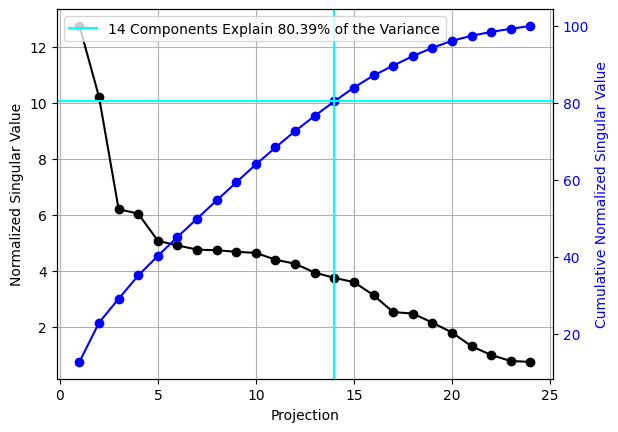

In [295]:
fig, ax1 = plt.subplots()

ax1_color = "black"
ax1.plot(
    np.arange(len(normalized_sigma)) + 1,
    normalized_sigma,
    linestyle="solid",
    marker="o",
    color=ax1_color,
)

ax1.grid(True)
# ax1.set_title("Normalized Singular Values")
ax1.set_xlabel("Projection")
ax1.set_ylabel("Normalized Singular Value", color=ax1_color)

ax2_color = "blue"
ax2 = ax1.twinx()
ax2.plot(
    np.arange(len(cum_normalized_sigma)) + 1,
    cum_normalized_sigma,
    linestyle="solid",
    marker="o",
    color=ax2_color,
)

ax2.set_ylabel("Cumulative Normalized Singular Value", color=ax2_color)
ax2.tick_params(axis="y", labelcolor=ax2_color)

ax2.axhline(cum_normalized_sigma[sv_ncomp_to - 1], color="cyan")
ax2.axvline(
    sv_ncomp_to, label=labelfcn(cum_normalized_sigma, sv_ncomp_to), color="cyan"
)
plt.legend()

### Explained Variance

#### Num Components Needed

In [296]:
cum_var_explained = pca.explained_variance_ratio_.cumsum() * 100.0
ncomp_to = np.argmax(cum_var_explained >= min_var_explained_pct) + 1
display(
    [
        ncomp_to,
        cum_var_explained[ncomp_to - 1],
    ]
)

[10, 80.73719020810076]

##### Verify Against Built-In

In [297]:
pca_80_pct = PCA(n_components=min_var_explained_pct / 100.0)
pca_80_pct.fit_transform(df_scaled)
ncomp_to_check = pca_80_pct.n_components_
assert ncomp_to == ncomp_to_check, "Disagreement on Number of Components to for 80%"

#### Plot

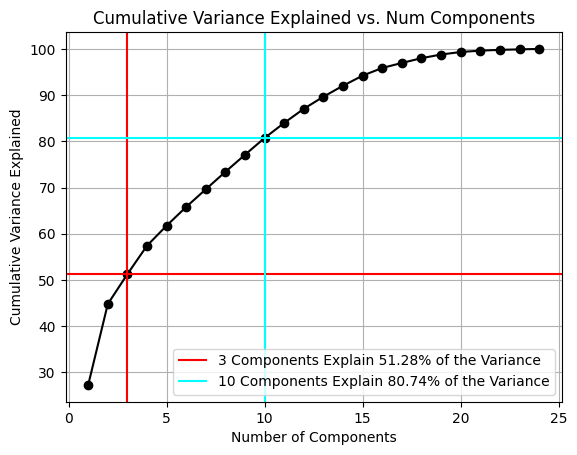

In [298]:
plt.plot(
    np.arange(len(cum_var_explained)) + 1,
    cum_var_explained,
    linestyle="solid",
    marker="o",
    color="black",
)

plt.grid(True)

ncomp_3 = 3

plt.axhline(
    cum_var_explained[ncomp_3 - 1],
    label=labelfcn(cum_var_explained, ncomp_3),
    color="red",
)
plt.axvline(ncomp_3, label="", color="red")

plt.axhline(cum_var_explained[ncomp_to - 1], label="", color="cyan")
plt.axvline(ncomp_to, label=labelfcn(cum_var_explained, ncomp_to), color="cyan")

plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Variance Explained vs. Num Components")
plt.legend()

## PCA Fit as DataFrame

In [299]:
df_pca = pd.DataFrame(
    pca_80_pct.fit_transform(df_scaled),
    columns=pca_80_pct.get_feature_names_out(),
)
df_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
0,-1.800973,-1.270393,-0.590286,-0.400280,-0.111692,-1.623466,2.692829,0.093173,-0.524138,-0.214027
1,-0.671428,-2.406269,1.040739,-0.357750,0.299735,-0.975038,0.784863,0.280618,-0.095559,-0.160048
2,-0.858546,-0.969766,0.470753,-0.477488,0.953600,0.069042,-0.276237,-0.238147,0.001802,-0.152952
3,-0.210006,-0.706131,-0.782280,0.208426,1.068147,-0.199161,-0.503671,0.108684,0.034604,0.118079
4,-0.860082,0.002982,-1.041115,2.245476,-0.464815,1.410883,-0.627011,0.552881,0.253847,0.608486
